# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [20]:
def P1(num_examples=5):
    for i in range(num_examples):
        print("Training example at index %d:" %i)
        print('\t', "Label:", newsgroups_train.target_names[train_labels[i]])
        print("-------------------------------Start of Message-------------------------------")
        print(train_data[i])
        print("--------------------------------End of Message--------------------------------", '\n', '\n')

P1(5)

Training example at index 0:
	 Label: comp.graphics
-------------------------------Start of Message-------------------------------
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--------------------------------End of Message-------------------------------- 
 

Training example at index 1:
	 Label: talk.religion.misc
-------------------------------Start of Message-------------------------------


Seems to be, barring evidence to the co

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [70]:
def P2():
    
    ##########Transform the training data into a matrix of word unigram feature vectors##########
    print('Transform the training data into a matrix of word unigram feature vectors.\n')
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    
    # What is the size of the vocabulary? 
    print("\tThe size of the vocabulary is %d" % X.shape[1])
    
    # What is the average number of non-zero features per example?
    print("\tThe average number of non-zero features per example is %4.2f" % (X.nnz/X.shape[0]))
    
    # What is the fraction of the non-zero entries in the matrix?
    print("\tThe fraction of the non-zero entries in the matrix is %7.6f" % (X.nnz/X.shape[0]/X.shape[1]))
    
    # What are the 0th and last feature strings (in alphabetical order)?
    print('\tThe 0th feature: %s' % vectorizer.get_feature_names()[0])
    print('\tThe last feature: %s' % vectorizer.get_feature_names()[-1])
    
    print('\n*******************************************************************************\n')
    
    ##########Now transform the training data into a matrix of word unigram feature vectors using your own vocabulary##########
    print("Now transform the training data into a matrix of word unigram feature vectors using your own vocabulary.\n")
    vectorizer_4v = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
    X_4v = vectorizer_4v.transform(train_data)
    
    # Confirm the size of the vocabulary
    print("\tThe size of the vocabulary is %d" % X_4v.shape[1])
    
    # What is the average number of non-zero features per example?
    print("\tThe average number of non-zero features per example is %5.4f" % (X_4v.nnz/X_4v.shape[0]))
    
    print('\n*******************************************************************************\n')
    
    ##########Now transform the training data into a matrix of character bigram and trigram feature vectors##########
    print("Now transform the training data into a matrix of character bigram and trigram feature vectors.\n")
    
    # analyzer = 'char'
    print("a) analyzer = 'char'")
    vectorizer_gm = CountVectorizer(analyzer='char', ngram_range=(2,3))
    X_gm = vectorizer_gm.fit_transform(train_data)
    # What is the size of the vocabulary?
    print("\tThe size of the vocabulary is %d" % X_gm.shape[1])
    
    # analyzer = 'char_wb'
    print("b) analyzer = 'char_wb'")
    vectorizer_gm_wb = CountVectorizer(analyzer='char_wb', ngram_range=(2,3))
    X_gm_wb = vectorizer_gm_wb.fit_transform(train_data)
    # What is the size of the vocabulary?
    print("\tThe size of the vocabulary is %d" % X_gm_wb.shape[1])
    
    print('\n*******************************************************************************\n')
    
    ##########Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents.##########
    print("Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents.\n")
    vectorizer_p = CountVectorizer(min_df=10)
    X_p = vectorizer_p.fit_transform(train_data)
    # What is the size of the vocabulary?
    print("\tThe size of the vocabulary is %d" % X_p.shape[1])
    
    print('\n*******************************************************************************\n')
    
    ##########Now again transform the training data into a matrix of word unigram feature vectors.##########
    print("Now again transform the training data into a matrix of word unigram feature vectors.\n")
    # Have vectorizer from first part
    train_vocab = vectorizer.get_feature_names()
    # for dev data
    vectorizer_dev = CountVectorizer()
    X_dev = vectorizer_dev.fit_transform(dev_data)
    dev_vocab = vectorizer_dev.get_feature_names()
    
    # What is the fraction of words in the development vocabulary that is missing from the training vocabulary?
    print("\tFraction of words in the development vocabulary that is missing from the training vocabulary: %.5f" %(len(np.setdiff1d(dev_vocab,train_vocab))/len(dev_vocab)))


P2()

Transform the training data into a matrix of word unigram feature vectors.

	The size of the vocabulary is 26879
	The average number of non-zero features per example is 96.71
	The fraction of the non-zero entries in the matrix is 0.003598
	The 0th feature: 00
	The last feature: zyxel

*******************************************************************************

Now transform the training data into a matrix of word unigram feature vectors using your own vocabulary.

	The size of the vocabulary is 4
	The average number of non-zero features per example is 0.2684

*******************************************************************************

Now transform the training data into a matrix of character bigram and trigram feature vectors.

a) analyzer = 'char'
	The size of the vocabulary is 35478
b) analyzer = 'char_wb'
	The size of the vocabulary is 28954

*******************************************************************************

Now transform the training data into a matrix of wor

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [254]:
def P3():
    # Transform the training and development data to matrices of word unigram feature vectors.
    vectorizer=CountVectorizer()
    X=vectorizer.fit_transform(train_data)
    D=vectorizer.transform(dev_data) 
    
    #################### Part 1 - KNN ####################
    print("************************** Part 1 - KNN **************************\n")
    k_values = [i for i in range(1,92,10)] + [i for i in range(93,101,1)]
    f1_list = []
    for k in k_values:
        # Produce k-Nearest Neighbors model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, train_labels)
        pred_labels = knn.predict(D)
        f1 = metrics.f1_score(dev_labels, pred_labels, average='macro')
        f1_list.append(f1)
        print("\tFor k = %d: \tf1 score = %f" %(k, f1))
    
    k_opt = k_values[f1_list.index(max(f1_list))]
    print("\nk_value to optimize f1: %d" %k_opt)
    
    #################### Part 2 - MNB ####################
    print("\n************************** Part 2 - MNB **************************\n")
    #a_values = [i/100 for i in range(1, 101, 5)]
    a_values = [0.0001, 0.001, 0.005, 0.01] + [i/1000 for i in range(250, 280, 5)] + [0.5, 1.0, 2.0, 10.0]
    f1_list = []
    for a in a_values:
        mnb = MultinomialNB(alpha=a)
        mnb.fit(X, train_labels)
        pred_labels = mnb.predict(D)
        f1 = metrics.f1_score(dev_labels, pred_labels, average='macro')
        f1_list.append(f1)
        print("\tFor alpha = %f: \tf1 score = %f" %(a, f1))
    
    a_opt = a_values[f1_list.index(max(f1_list))]
    print("\nalpha to optimize f1: %f" %a_opt)
    
    #################### Part 3 - LRM ####################
    print("\n************************** Part 3 - LRM **************************\n")
    c_values = [0.001, 0.01] + [i/100 for i in range(20,41,5)] + [0.5, 1.0]
    f1_list = []
    for c in c_values:
        lrm = LogisticRegression(C=c, solver="liblinear", multi_class="auto")
        lrm.fit(X, train_labels)
        pred_labels = lrm.predict(D)
        f1 = metrics.f1_score(dev_labels, pred_labels, average="weighted")
        f1_list.append(f1)
        print("\tFor C = %f:" % c)
        print("\t\tf1 score = %f" % f1)
        for i in range(4):
            ssw = np.sum(np.square(lrm.coef_[i]))
            print("\t\tSum of squared weights for topic %s: %f" %(newsgroups_train.target_names[i], ssw))
    
    c_opt = c_values[f1_list.index(max(f1_list))]
    print("\nC to optimize f1: %f" %c_opt)

P3()

************************** Part 1 - KNN **************************

	For k = 1: 	f1 score = 0.368932
	For k = 11: 	f1 score = 0.412756
	For k = 21: 	f1 score = 0.412569
	For k = 31: 	f1 score = 0.428160
	For k = 41: 	f1 score = 0.446902
	For k = 51: 	f1 score = 0.396359
	For k = 61: 	f1 score = 0.420387
	For k = 71: 	f1 score = 0.434572
	For k = 81: 	f1 score = 0.424450
	For k = 91: 	f1 score = 0.437523
	For k = 93: 	f1 score = 0.441840
	For k = 94: 	f1 score = 0.447340
	For k = 95: 	f1 score = 0.437576
	For k = 96: 	f1 score = 0.433609
	For k = 97: 	f1 score = 0.448327
	For k = 98: 	f1 score = 0.433586
	For k = 99: 	f1 score = 0.424634
	For k = 100: 	f1 score = 0.426226

k_value to optimize f1: 97

************************** Part 2 - MNB **************************

	For alpha = 0.000100: 	f1 score = 0.741633
	For alpha = 0.001000: 	f1 score = 0.750774
	For alpha = 0.005000: 	f1 score = 0.752940
	For alpha = 0.010000: 	f1 score = 0.755289
	For alpha = 0.250000: 	f1 score = 0.770999
	Fo

ANSWER:
1) Why doesn't k-Nearest Neighbors work well for this problem?

KNN uses similarity or distance metrics. There are many common words between all documents; the most common words in a document are likely the most common words in all of the other documents. Because of that, it is more difficult for the assigned similarity metric to correctly classify the class.

2) Why doesn't Logistic Regression work as well as Naive Bayes does?

For logistic regression, overfitting may occur when the number of samples is less than the number of features.

3) What is the relationship between logistic regression's sum of squared weights vs. C value?

The  C value is the inverse of regularization strength. Greater C values have a smaller regularization strength, which means smaller sum of squared weights. This is consistent with the printed C values and sum of squared weights.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [139]:
def P4():
    ### STUDENT START ###
    vectorizer_w2 = CountVectorizer(ngram_range=(2,2))
    X_w2 = vectorizer_w2.fit_transform(train_data)
    lrm_w2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lrm_w2.fit(X_w2, train_labels)
    words = vectorizer_w2.get_feature_names()
    topfeat_ind = []
    for i in range (4):
        itopfeat_ind = lrm_w2.coef_[i].argsort()[-5:]
        topfeat_ind += itopfeat_ind.tolist()
        print("Features with largest weights for label %s:" %newsgroups_train.target_names[i])
        print('\t', [words[ind] for ind in itopfeat_ind.tolist()], '\n')
    print("{:<15} {:<15} {:<17} {:<13} {:<15}".format('Feature',newsgroups_train.target_names[0],newsgroups_train.target_names[1],newsgroups_train.target_names[2],newsgroups_train.target_names[3]))
    for ind in topfeat_ind:
        feat = words[ind]
        coefs = [lrm_w2.coef_[i][ind] for i in range(4)]
        print("{:<15} {:<15.5} {:<17.5} {:<13.5} {:<15.5}".format(feat, coefs[0], coefs[1], coefs[2], coefs[3]))
    ### STUDENT END ###

P4()

Features with largest weights for label alt.atheism:
	 ['are you', 'you are', 'was just', 'cheers kent', 'claim that'] 

Features with largest weights for label comp.graphics:
	 ['is there', 'out there', 'comp graphics', 'in advance', 'looking for'] 

Features with largest weights for label sci.space:
	 ['it was', 'and such', 'sci space', 'the moon', 'the space'] 

Features with largest weights for label talk.religion.misc:
	 ['of jesus', 'but he', 'ignorance is', 'cheers kent', 'the fbi'] 

Feature         alt.atheism     comp.graphics     sci.space     talk.religion.misc
are you         0.44695         -0.24829          -0.097126     -0.30562       
you are         0.47274         -0.27985          -0.48131      0.028385       
was just        0.48205         -0.13142          -0.12893      -0.22747       
cheers kent     0.55572         -0.69789          -0.66374      0.5348         
claim that      0.60555         -0.19903          -0.27434      -0.14036       
is there        -0.3

ANSWER:

Some interesting observations:
- `'cheers kent'` is a top feature of atheism and religion
- `'are you'` and `'you are'` are both top features of atheism
- `'is there'` and `'out there'` are both top features of graphics
- `'the fbi'` is a top feature of religion

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [178]:
# set of stop words
stop_words = {'few', 'do', 'haven', 'don', 'nor', 'should', 'hadn', 'where', 'having', 'off', "doesn't", 'o', 
              'by', 'for', 'own', 's', 'is', 'yours', 'but', 'him', 'or', 'an', 'my', 'not', 'ours', 'most', 
              'doing', 'if', "mustn't", 'over', 'm', 'just', 'now', 'they', 'being', 'isn', 'shan', 
              'yourself', 'while', 'such', 're', "mightn't", 'down', 'wouldn', "you're", 'hasn', 'their', 
              'then', 'at', 'can', 'himself', 'about', 'shouldn', 'up', 'ourselves', 'she', 'other', 'our', 
              'won', 'myself', 'has', 'didn', 'you', 'aren', 'ain', 'll', 'theirs', 'during', 'above', 'with', 
              "wasn't", 'against', 'into', 'his', 'y', 'between', 'did', 'from', 'd', "couldn't", "shouldn't", 
              "won't", "it's", "that'll", 'no', "aren't", 'he', 'doesn', 'the', 'this', 'any', 'be', 'too', 
              "hasn't", 'a', "she's", 'weren', 'until', 'them', 'whom', 'yourselves', 'and', 'which', 'once', 
              'why', 'mightn', 'very', 'in', 't', 've', 'your', 'to', 'there', 'will', "hadn't", 'been', 
              "you've", 'we', 'some', 'itself', 'more', 'what', 'again', 'hers', 'does', 'further', 'who', 
              'those', 'are', 'am', 'here', 'as', 'have', 'couldn', 'herself', 'were', "needn't", 'its', 
              'under', 'out', 'was', 'on', "shan't", 'i', 'each', "you'd", 'because', 'her', 'of', 'before', 
              "haven't", "should've", 'that', 'both', 'so', 'needn', 'mustn', 'when', 'after', 'how', 'wasn', 
              "isn't", 'through', 'it', 'than', "weren't", 'below', 'ma', 'themselves', "don't", 'had', 
              "wouldn't", 'same', 'all', 'these', 'only', "didn't", 'me', "you'll"}

def better_preprocessor(s):
    # tranform strings to lower case
    s = s.lower()
    
    # replace sequences of numbers with single tokens
    s = re.sub('\d+(\.\d*)?', 'number', s)
    
    # remove various non-letter characters
    s = re.sub('[^A-Za-z0-9 -\'\\n]', ' ', s)
    
    # shorten long words
    s = re.sub('(\w{7})\w+', '\\1', s)
    
    # split words
    words = s.split()
    
    filtered_words = [w for w in words if not w in stop_words]
    #filtered_words = [w for w in filtered_words if not ]
    s = ' '.join(filtered_words)
    
    return(s)


def P5():
    
    # For no preprocessing of text
    vectorizer=CountVectorizer()
    X=vectorizer.fit_transform(train_data)
    D=vectorizer.transform(dev_data)
    lrm = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lrm.fit(X, train_labels)
    pred_labels = lrm.predict(D)
    f1 = metrics.f1_score(dev_labels, pred_labels, average="weighted")
    
    print('For no preprocessing of text:')
    print('\tSize of Dictionary: %d' %X.shape[1])
    print('\tF1 score: %f' %f1)
    
    # For preprocessing of text
    vectorizer_p=CountVectorizer()
    train_data_p = [better_preprocessor(s) for s in train_data]
    dev_data_p = [better_preprocessor(s) for s in dev_data]
    X_p=vectorizer.fit_transform(train_data_p)
    D_p=vectorizer.transform(dev_data_p)
    lrm_p = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lrm_p.fit(X_p, train_labels)
    pred_labels_p = lrm_p.predict(D_p)
    f1_p = metrics.f1_score(dev_labels, pred_labels_p, average="weighted")

    print('\nFor preprocessing of text:')
    print('\tSize of Dictionary: %d' %X_p.shape[1])
    print('\tF1 score: %f' %f1_p)
    
    # How much did the improved model reduce the vocabulary size?
    print('\nThe improved model reduced the vocabulary size by %d and increased the F1 score by %f' %(X.shape[1]-X_p.shape[1], f1_p-f1))

P5()

For no preprocessing of text:
	Size of Dictionary: 26879
	F1 score: 0.708474

For preprocessing of text:
	Size of Dictionary: 19830
	F1 score: 0.733419

The improved model reduced the vocabulary size by 7049 and increased the F1 score by 0.024945


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

F1 score for L2 full vocabulary: 0.708474

C          Vocab Size      F1 (New L2 Model)    F1 (L1 Model)        (F1 New L2) - (F1 full L2)
0.001      3               0.16111712017419214  0.24492835290439324  -0.5473568574748527 
0.01       17              0.4233524367089317   0.4205146637187051   -0.28512154094011316
0.1        207             0.6518656297915059   0.6492777622919462   -0.05660834785753899
0.5        732             0.6773078481061637   0.6830929275641188   -0.031166129542881116
1.0        1217            0.6959834394671132   0.6963408597169018   -0.012490538181931687
2.0        1517            0.6976611287877951   0.6901754464329778   -0.01081284886124978
10.0       3489            0.6715998234762998   0.6713718698797676   -0.03687415417274509
20.0       4062            0.6486199949852695   0.6342807317874021   -0.059853982663775396




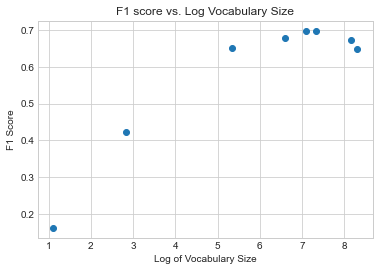

In [249]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    # regularization strength is the inverse of C: regularization strength = 0.5 -> C = 1/0.5 = 2
    # In thread, said C = 0.5 for L2
    
    c_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 20.0]
    
    vectorizer=CountVectorizer()
    X=vectorizer.fit_transform(train_data)
    D=vectorizer.transform(dev_data)
    
    #
    vocab_size = np.empty(0, dtype=int)
    # f1 scores for 
    f1_l1_arr = np.empty(0, dtype=float)
    f1_l2_rv_arr = np.empty(0, dtype=float)
    
    lrm_l2 = LogisticRegression(C=0.5, penalty="l2", solver="liblinear", multi_class="auto")
    lrm_l2.fit(X, train_labels)
    pred_labels_l2 = lrm_l2.predict(D)
    # f1 score for L2 default vocabulary
    f1_l2_full = metrics.f1_score(dev_labels, pred_labels_l2, average="weighted")
    print("F1 score for L2 full vocabulary: %f\n" % f1_l2_full)

    for c in c_values:
        lrm_l1 = LogisticRegression(C=c, penalty="l1", solver="liblinear", multi_class="auto", tol=0.015)
        lrm_l1.fit(X, train_labels)
        pred_labels_l1 = lrm_l1.predict(D)
        f1_l1 = metrics.f1_score(dev_labels, pred_labels_l1, average="weighted")
        f1_l1_arr = np.append(f1_l1_arr, f1_l1)
        
        nz_coef = np.empty(0, dtype=int)
        for i in range(4):
            nz_coef = np.append(nz_coef, np.nonzero(lrm_l1.coef_[i]))
        vocab_size = np.append(vocab_size, len(np.unique(nz_coef)))
        
        lrm_l2.coef_ = lrm_l1.coef_
        pred_labels_l2 = lrm_l2.predict(D)
        f1_l2 = metrics.f1_score(dev_labels, pred_labels_l2, average="weighted")
        f1_l2_rv_arr = np.append(f1_l2_rv_arr, f1_l2)
    
    print("{:<10} {:<15} {:<20} {:<20} {:<20}".format('C', 'Vocab Size','F1 (New L2 Model)', 'F1 (L1 Model)', '(F1 New L2) - (F1 full L2)'))
    for i in range(len(c_values)):
        print("{:<10} {:<15} {:<20} {:<20} {:<20}".format(c_values[i], vocab_size[i], f1_l2_rv_arr[i], f1_l1_arr[i], f1_l2_rv_arr[i]-f1_l2_full))
    print('\n')
    
    plt.style.use('seaborn-whitegrid')
    log_vocab_size = np.log(vocab_size)
    plt.scatter(log_vocab_size, f1_l2_rv_arr)
    plt.xlabel('Log of Vocabulary Size')
    plt.ylabel('F1 Score')
    plt.title('F1 score vs. Log Vocabulary Size')

P6()

ANSWER:

The models based on reduced vocabularies do not perform as well as the model based on the full vocabulary. The F1 scores of the reduced vocabulary models are lower than the model based on the full vocabulary, as shown in the last column of the table above.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [250]:
def P7():

    vectorizer = TfidfVectorizer()
    X=vectorizer.fit_transform(train_data)
    D=vectorizer.transform(dev_data)
    
    lrm = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    lrm.fit(X, train_labels)
    pred_labels = lrm.predict(D)
    f1 = metrics.f1_score(dev_labels, pred_labels, average="weighted")
    print('F1 Score: %f\n' %f1)
    pred_prob = lrm.predict_proba(D)       
    
    # R Ratio = maximum predicted probability / predicted probability of correct label
    R = np.array([max(pred_prob[i])/pred_prob[i][dev_labels[i]] for i in range(len(pred_prob))])
    high_R = np.argsort(R)[-3:]
    
    for ind in high_R:
        print('Dev Data Index: %d\n' %ind)
        print('\tR Ratio: %f' %R[ind])
        print('\tPredicted Label: %s' % newsgroups_train.target_names[pred_labels[ind]])
        print('\tActual Label: %s\n' % newsgroups_train.target_names[dev_labels[ind]])
 
        print("-------------------------------Start of Message-------------------------------")
        print(dev_data[ind])
        print("--------------------------------End of Message--------------------------------", '\n\n\n')

P7()

F1 Score: 0.759766

Dev Data Index: 607

	R Ratio: 287.178938
	Predicted Label: talk.religion.misc
	Actual Label: alt.atheism

-------------------------------Start of Message-------------------------------

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...

--------------------------------End of Message-------------------------------- 



Dev Data Index: 665

	R Ratio: 325.003924
	Predicted Label: comp.graphics
	Actual Label: talk.religion.misc

-------------------------------Start of Message-------------------------------
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.
--------------------------------End of Message-------------------------------- 



Dev Data Index: 215

	R Ratio: 929.357170
	Predicted Label: comp.graphics
	Actual Label: talk.religion.misc

-------------------------------Start of Message-----

ANSWER:

1) How is `TfidfVectorizer` different than `CountVectorizer`?

Unlike `CountVectorizer`, `TfidfVectorizer` considers the problem that the most common words in a document are likely the most common words in all of the other documents. `TfidfVectorizer` the tfidf metric to give less weight to words frequently used in other documents. `CountVectorizer` uses just word fequency.

2) What kinds of mistakes is the model making?

- The tfidf metric is not a good measurement for short documents.
- Religion documents and atheism documents share common terms; we caught a glimpse of in part 4. This makes classifying these documents more difficult.

3) Explain what the R ratio describes.

For each sample, there is a predicted probability of the sample assigned to each label. The predicted label is the label with the highest predicted probability. The R ratio is that highest predicted probability divided by the predict probability of the correct label.

4) Suggest a way to address one particular issue that you see.

Remove words common to both religion documents and atheism documents from the vocabulary.